In [27]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
# from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

In [5]:
df = pd.read_csv('kmeans.csv', delimiter='\t')

In [6]:
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28.0
1,3423313212,52.53,25.0
2,3423313724,64.54,27.0
3,3423311373,55.69,22.0
4,3423310999,54.58,25.0


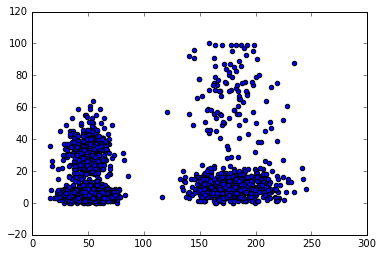

In [10]:
f1 = df['Distance_Feature'].values
f2 = df['Speeding_Feature'].values

%matplotlib inline
x = np.array(zip(f1,f2))
plt.scatter(x[:,0], x[:,1])
plt.show()

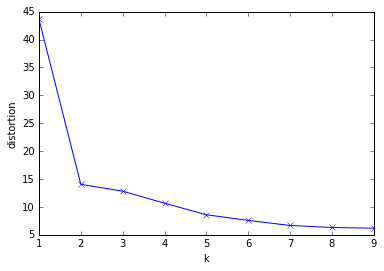

In [17]:
distortions = []
K = range(1,10)
for k in K:
    kmeans = KMeans(n_clusters=k).fit(x)
    distortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, 'euclidean'), axis=1))/x.shape[0])

plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('distortion')
plt.show()

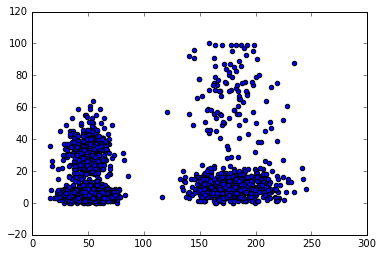

In [22]:
kmeans = KMeans(n_clusters=2).fit(x)
color = kmeans.labels_
plt.scatter(x[:,0],x[:,1])
# plt.show(kmeans, colors=color)

NonGuiException: 

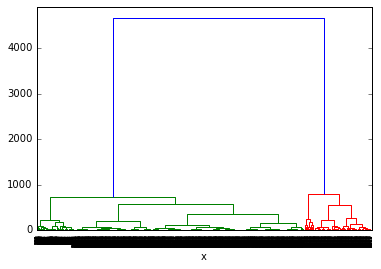

In [34]:
z = linkage(x, 'ward')
plt.xlabel('x')
dendrogram(z, leaf_rotation=90)
plt.show()